### Bootstrapper

In [9]:
from curves import bootstrap_contracts
from datetime import date

q1_price = 19.05
contracts = [
    (date(2019, 1, 1), 18.95), # Jan-19
    (date(2019, 1, 1), date(2019, 3, 1), 19.05) # Q1-19
]
piecewise_curve, bootstrapped_contracts = bootstrap_contracts(contracts, freq='M')
print(piecewise_curve)
print()
for bc in bootstrapped_contracts:
    print("{0}, {1}, {2:.3f}".format(repr(bc.start), repr(bc.end), bc.price))


2019-01    18.950000
2019-02    19.102542
2019-03    19.102542
Freq: M, dtype: float64

Period('2019-01', 'M'), Period('2019-01', 'M'), 18.950
Period('2019-02', 'M'), Period('2019-03', 'M'), 19.103


### Spline Interpolation

<Axes: title={'center': 'Interpolated Daily Curve'}>

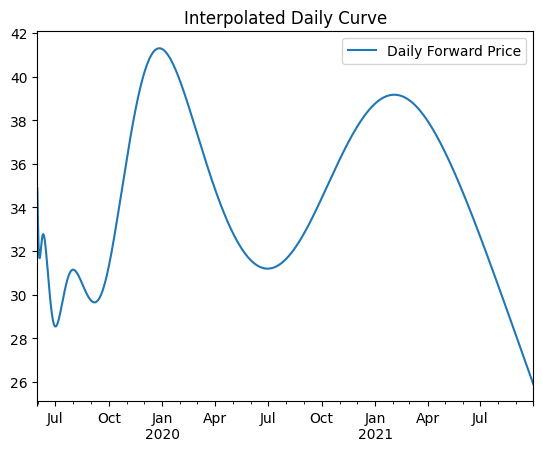

In [10]:
from curves import max_smooth_interp
from curves import contract_period as cp
import pandas as pd

contracts = [
    (date(2019, 5, 31), 34.875),
    (date(2019, 6, 1), date(2019, 6, 2), 32.87),
    ((date(2019, 6, 3), date(2019, 6, 9)), 32.14),
    (pd.Period(year=2019, month=6, freq='M'), 31.08),
    (cp.month(2019, 7), 29.95),
    (cp.q_3(2019), 30.18),
    (cp.q_4(2019), 37.64),
    (cp.winter(2019), 38.05),
    (cp.summer(2020), 32.39),
    (cp.winter(2020), 37.84),
    (cp.gas_year(2020), 35.12)
]

pc_for_spline, bc_for_spline = bootstrap_contracts(contracts, freq='D')
smooth_curve = max_smooth_interp(bc_for_spline, freq='D')
smooth_curve.plot(title='Interpolated Daily Curve', legend=True, label='Daily Forward Price')
